# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [34]:
# Checking the number of mice.
unique_mouse_ids = merged_data_df["Mouse ID"].unique()
print(f"Number of mice: {len(unique_mouse_ids)}")

Number of mice: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_id_timepoint_data_df = merged_data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
mouse_id_timepoint_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [35]:
# Checking the number of mice in the clean DataFrame.
print(f"Number of unique mice in cleaned DataFrame: {len(mouse_id_timepoint_data_df.drop_duplicates(subset=['Mouse ID']))}")

Number of unique mice in cleaned DataFrame: 249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_regimen_df = mouse_id_timepoint_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean = grouped_regimen_df.mean()

median = grouped_regimen_df.median()

variance = grouped_regimen_df.var()

std_deviation = grouped_regimen_df.std()

std_err = grouped_regimen_df.sem()

summary_df = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': std_deviation,
    'Tumor Volume Std. Err.': std_err
})

summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [38]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_df = grouped_regimen_df.agg([
    ('Mean Tumor Volume', 'mean'),
    ('Median Tumor Volume', 'median'),
    ('Tumor Volume Variance', 'var'),
    ('Tumor Volume Std. Dev.', 'std'),
    ('Tumor Volume Std. Err.', 'sem')
]).reset_index()

display(summary_df)


,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

Text(0, 0.5, '# of Oberved Mouse Timepoints')

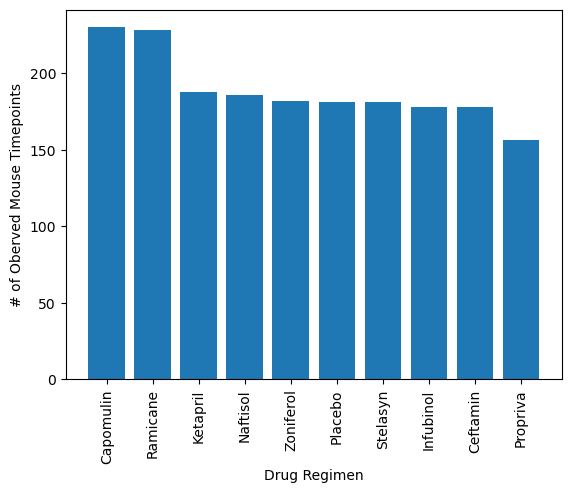

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_timepoints = mouse_id_timepoint_data_df["Drug Regimen"].value_counts()
drug_regimens = mouse_timepoints.index
plt.xticks(rotation="vertical")
plt.bar(drug_regimens, mouse_timepoints)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Oberved Mouse Timepoints")


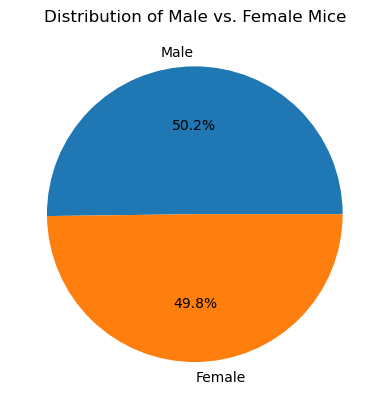

In [40]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
labels = ["Male", "Female"]
unique_mice = mouse_id_timepoint_data_df.drop_duplicates(subset=['Mouse ID'])
mice_by_gender = unique_mice["Sex"].value_counts()

# Make the pie chart
plt.pie(mice_by_gender, labels=mice_by_gender.index, autopct="%1.1f%%")
plt.title("Distribution of Male vs. Female Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = mouse_id_timepoint_data_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_df = pd.merge(max_timepoints, mouse_id_timepoint_data_df, on=['Mouse ID', 'Timepoint'])

# Display filtered results
columns_to_display = ["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]
display(result_filtered[columns_to_display].sort_values(by="Drug Regimen"))


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
116,Capomulin,l897,45,38.846876
86,Capomulin,j119,45,38.125164
88,Capomulin,j246,35,38.753265
193,Capomulin,u364,45,31.023923
66,Capomulin,g316,45,40.159220
...,...,...,...,...
92,Ramicane,j913,45,31.560470
94,Ramicane,j989,45,36.134852
97,Ramicane,k403,45,22.050126
120,Ramicane,m546,45,30.564625


In [15]:

# Filter for the treatments of interest
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
result_filtered = final_tumor_df[final_tumor_df["Drug Regimen"].isin(treatments)]

# Initialize dictionaries for quartiles, IQR, and outliers
quartiles_dict = {}
iqr_dict = {}
outliers_dict = {}

# Calculate quartiles, IQR, and outliers
for treatment in treatments:
    # Filter data for the current treatment
    data = result_filtered[result_filtered["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # Calculate quartiles and IQR
    quartiles = data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    # Store the results
    quartiles_dict[treatment] = quartiles
    iqr_dict[treatment] = iqr
    outliers_dict[treatment] = outliers

# Print the results
for treatment in treatments:
    print(f"Treatment: {treatment}")
    print(f"Quartiles:\n{quartiles_dict[treatment]}")
    print(f"IQR: {iqr_dict[treatment]}")
    print(f"Outliers:\n{outliers_dict[treatment]}")
    print()

Treatment: Capomulin
Quartiles:
0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
IQR: 7.781863460000004
Outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment: Ramicane
Quartiles:
0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
IQR: 9.098536719999998
Outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment: Infubinol
Quartiles:
0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
IQR: 11.477135160000003
Outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Treatment: Ceftamin
Quartiles:
0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64
IQR: 15.577752179999997
Outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)



<Figure size 1000x700 with 0 Axes>

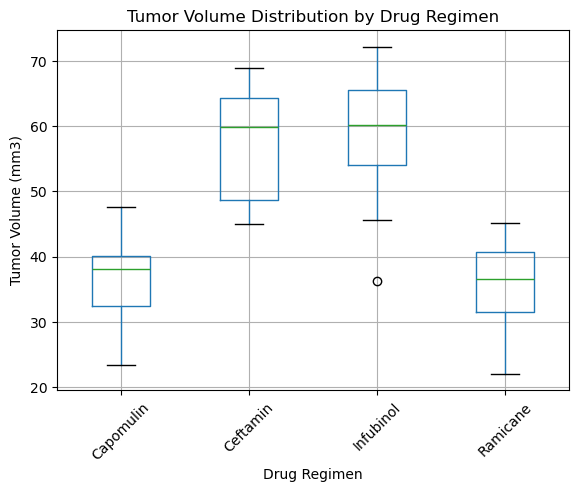

In [16]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 7))
result_filtered.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen')
plt.title('Tumor Volume Distribution by Drug Regimen')
plt.suptitle('')  # Suppress the default title to clean up the plot
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(rotation=45)
plt.show()

## Line and Scatter Plots

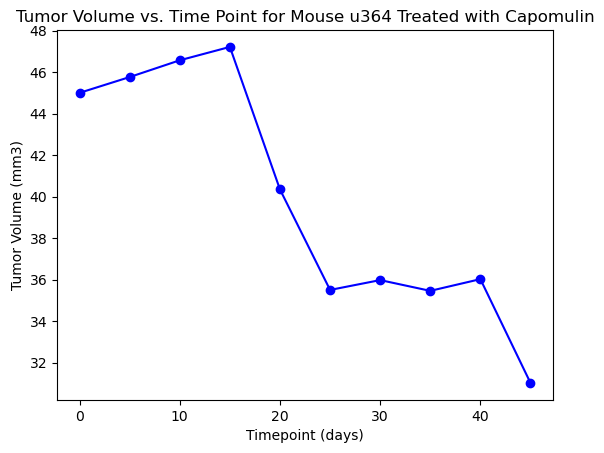

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'u364' 
treatment = 'Capomulin'
filtered_data = mouse_id_timepoint_data_df[(mouse_id_timepoint_data_df["Drug Regimen"] == treatment) &
                                           (mouse_id_timepoint_data_df["Mouse ID"] == mouse_id)]

filtered_data = filtered_data.sort_values(by='Timepoint')

plt.plot(filtered_data['Timepoint'], filtered_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} Treated with {treatment}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


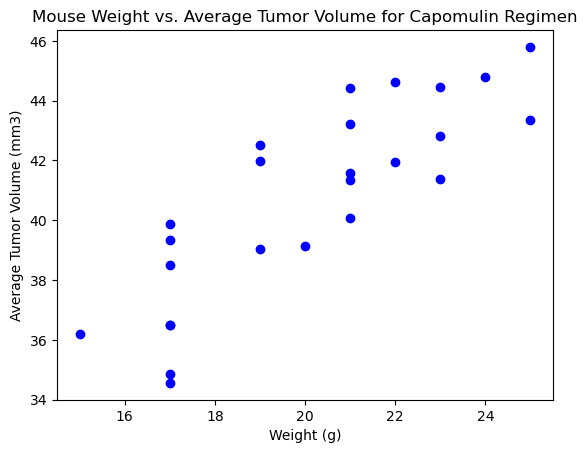

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for Capomulin regimen
capomulin_data = merged_data_df[merged_data_df["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()
average_tumor_volume.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"}, inplace=True)

# Merge with mouse weight data
mouse_weight_data = mouse_metadata[["Mouse ID", "Weight (g)"]]
merged_data = pd.merge(average_tumor_volume, mouse_weight_data, on="Mouse ID")

# Generate the scatter plot
plt.scatter(merged_data["Weight (g)"], merged_data["Average Tumor Volume (mm3)"], marker='o', color='b')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.84


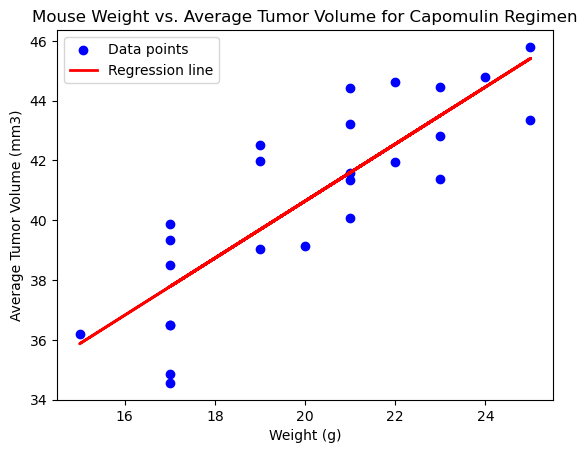

Linear Regression Model: y = 0.95x + 21.55
R-squared value: 0.71


In [33]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Extract data for correlation and regression
x = merged_data["Weight (g)"]
y = merged_data["Average Tumor Volume (mm3)"]

# Calculate the correlation coefficient
correlation_coefficient, _ = st.pearsonr(x, y)
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(x, y)

# Create the regression line
regression_line = slope * x + intercept

# Plot the data and regression line
plt.scatter(x, y, marker='o', color='b', label='Data points')
plt.plot(x, regression_line, color='r', linewidth=2, label='Regression line')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.show()

# Print linear regression details
print(f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}")
print(f"R-squared value: {r_value**2:.2f}")